# Customer Retention Analysis
Business can thrive and dive depending upon how happy your customers are, how loyal they are, and how willing they are to keep buying your services. Loyal customers are worth up to 10 times as much their first purchase and it is 6 to 7 times more expensive to land a new customer than to keep a current one. 

This project is aimed to

1. Understand the causes and/or scenarios causing attrition of customers 
2. Provide a predictive model that ranks the customers 
3. Learn the factors which are strongly correlated with churn rate 
4. Make recommendations to minimize the revenue loss 



# Dataset
In this project We will be using the [Telco Customer Churn dataset](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv) to study the customer behavior in order to develop focused customer retention programs.

This dataset has 7043 samples and 21 features, the features includes 

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents

# Questions we will try to answer during this project

1. Which variables influences if the client will leave? 
2. What are the most important variables to look?
3. Which clients have the highest chance of leaving?

In [493]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

# Data Ingestion

In [494]:
#Loading the data
df = pd.read_excel("Customer-Churn-Dataset.xls")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [495]:
df.shape

(7043, 21)

In [496]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [497]:
df['TotalCharges'].value_counts()

20.2       11
           11
19.75       9
20.05       8
19.9        8
19.65       8
45.3        7
19.55       7
19.45       6
20.25       6
20.15       6
20.45       5
20.3        5
69.95       4
19.3        4
69.6        4
19.85       4
19.95       4
70.6        4
20.35       4
50.15       4
44          4
74.7        4
19.5        4
69.9        4
19.4        4
75.3        4
69.65       4
49.9        4
20.4        4
           ..
1345.85     1
6792.45     1
762.45      1
6794.75     1
761.85      1
6743.55     1
1348.9      1
6741.15     1
6717.9      1
6705.7      1
4447.75     1
6707.15     1
2917.65     1
62.9        1
6710.5      1
6713.2      1
914         1
6716.45     1
63.15       1
742.9       1
6719.9      1
139.25      1
265.75      1
6725.5      1
2603.3      1
743.05      1
6733        1
4443.45     1
6735.05     1
4764        1
Name: TotalCharges, Length: 6531, dtype: int64

**Since we have 11 missing values in variable 'TotalCharges', so we will replace these empty spaces ith NA values.**

In [498]:
#Replacing empty spaces with Null values
df = df.replace(r'^\s+$', np.nan, regex=True)

In [499]:
df['TotalCharges'].value_counts()

20.20      11
19.75       9
19.65       8
20.05       8
19.90       8
45.30       7
19.55       7
19.45       6
20.15       6
20.25       6
20.30       5
20.45       5
69.95       4
69.90       4
19.85       4
69.60       4
44.40       4
69.65       4
19.50       4
19.20       4
19.95       4
49.90       4
20.50       4
20.35       4
70.60       4
44.00       4
50.15       4
19.40       4
75.30       4
74.70       4
           ..
1971.15     1
1793.25     1
1212.85     1
1504.05     1
1319.95     1
572.20      1
5958.85     1
1673.80     1
958.15      1
7610.10     1
92.05       1
2666.75     1
1001.50     1
7262.00     1
4740.00     1
96.45       1
4483.95     1
5574.75     1
44.65       1
2688.45     1
1374.35     1
3107.30     1
248.95      1
607.30      1
1534.05     1
1066.15     1
249.95      1
8333.95     1
7171.70     1
1024.00     1
Name: TotalCharges, Length: 6530, dtype: int64

In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

In [501]:
df['TotalCharges'].isnull().sum()

11

**Now all the empty spaces are removed from the dataset, now the dataset is almost complete so I will drop the few NA rows that has Null values**

In [502]:
# Dropping NA values
df = df.dropna()

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# Visualizing the missingness of data

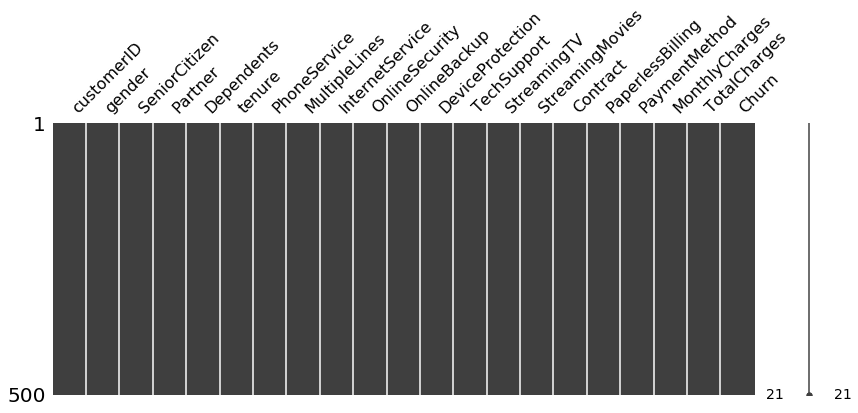

In [504]:
# Matrix of missingness of the data
missingness=msno.matrix(df.sample(500), figsize=(14, 5), width_ratios=(14, 1));

**Now the dataset is completely clean and we can start our analysis, but before diving into further analysis let us change the 'SeniorCitizen' variable from interger to categorial as this variable signifies the status of seniority of the customer**

In [505]:
df['SeniorCitizen']=pd.Categorical(df['SeniorCitizen'])

**So until now I have checked the size of my dataset,'CustomerId' is specific and unique to every row and it doesn’t help to predict if the client is going to Churn. So we will delete the CustomerID.**

In [506]:
# Deleting the custumerID column
del df["customerID"]

# Intial Analysis

## Lets split the dataset into numeric and objects to facilitate the analysis

In [507]:
#Splitting data according to datatypes
num = ['float64', 'int64']
num_df = df.select_dtypes(include=num)
obj_df = df.select_dtypes(exclude=num)

In [508]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [509]:
obj_df.describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [510]:
df.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

**The above gives us the idea that how the data is, and now we move further to understand correlation between variables.**

# Univariate Distribution

Now let us consider the numeric variables , how they are distributed and how they are related to each other and also how they can help in to predict the 'Churn' variable.

**To see the distribution we will use Boxplots and Histograms**

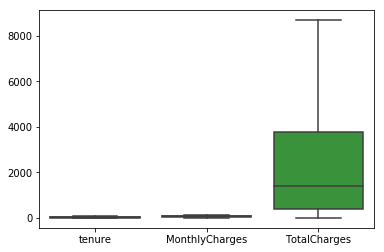

In [511]:
sns.boxplot(data = num_df)

[]

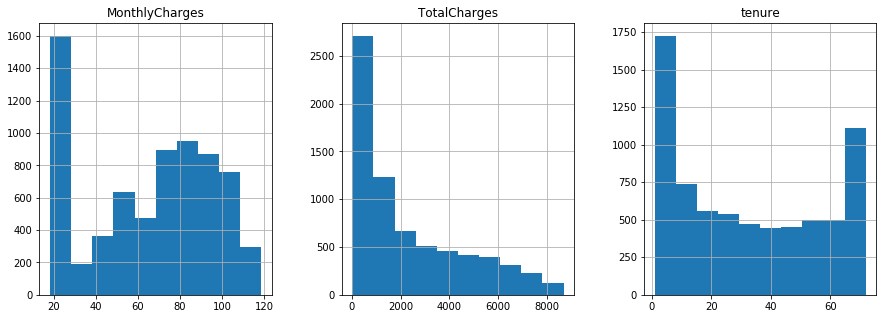

In [512]:
# histogram plots
num_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()

The above two plots shows that the numeric variables are not normally distributed , lets check how they are related to the variable we are trying to predict.

**Lets add the 'Churn' variable in numeric dataset**

In [513]:
num_df = pd.concat([num_df,df["Churn"]],axis=1)

In [514]:
num_df.head()

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes


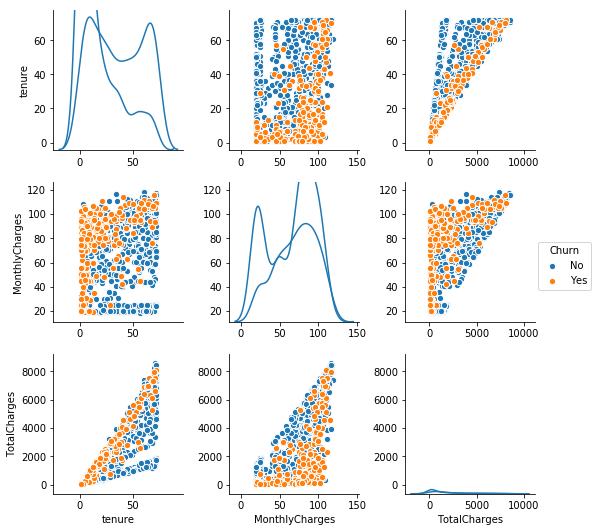

In [515]:
#Plotting pair plot to identify relationship between 'Churn' and other variables
g = sns.PairGrid(num_df.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

From the above plots 'tenure' and 'MonthlyCharges' are looking good predictors of the 'Churn' variable

Now lets divide the three numerical variables into bins and try to plot separately to identify the low Churn areas and high Churn areas.

We will use violin plots to decide bins of the numerical variables that we are going to use.

# Bivariate Distribution

Bivariate Distribution will allow us to identify how each numeric variable is distributed with respect to target variable 'Churn'

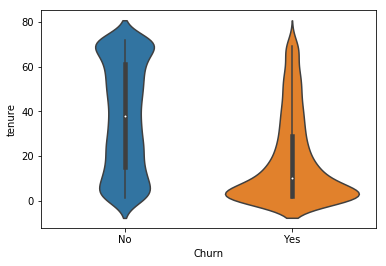

In [516]:
sns.violinplot(x="Churn", y="tenure", data=num_df);

**The above plot gives us the idea of size of bins for variable 'tenure'**

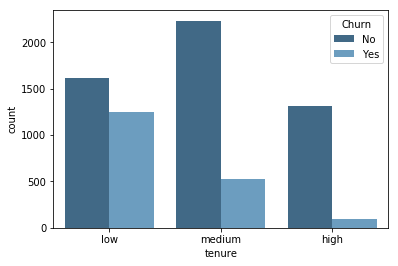

In [517]:
#Creating bins and plotting Countplot for 'tenure'
tenure_bins=pd.cut(num_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'tenure' variable with respect to target variable 'Churn'**

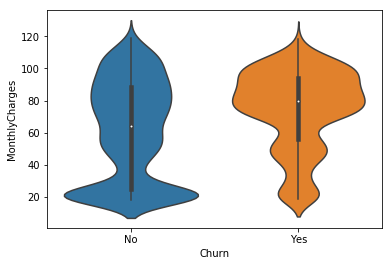

In [518]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=num_df);

**The above plots gives us the idea of size of bins for variable 'MonthlyCharges'**

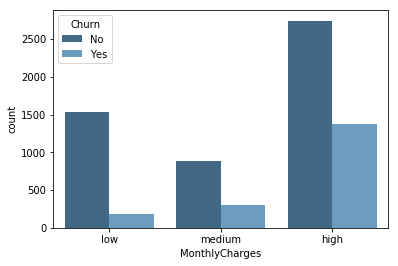

In [519]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
MonthlyCharges_bins=pd.cut(num_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'MonthlyCharges' variable with respect to target variable 'Churn'**

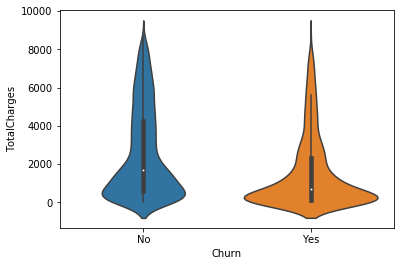

In [520]:
sns.violinplot(x="Churn", y="TotalCharges", data=num_df);

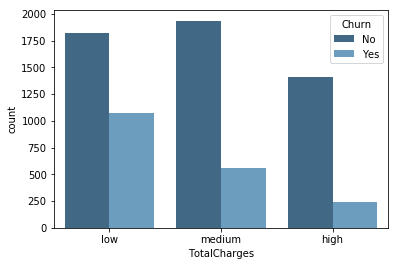

In [521]:
#Creating bins and plotting Countplot for 'MonthlyCharges'
TotalCharges_bins=pd.cut(num_df["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=num_df, palette="Blues_d");

**Plotting for 'TotalCharges' variable with respect to target variable 'Churn'**

I divided all three numerical variables in 3 bins according to the violin plot trying to separate then in a way to distinguish the low churn rate areas from the high churn rate areas and you can see from the count plots how the distribution is different in each bin.

Since the distribution is different in each bin, we will save them into another datframe

In [522]:
#Saving bins into dataframe
#bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

**From the above plots following can be deducted:**
    
    1. Less than a year tenure category has highest churn
    2. Customers paying high Monthly charges tends to churn more
    3. 2 to 5 years tenure category results in highest revenue loss
    4. There is not much variation in medium bin which means customer remain loyal as they cross a year
    
> * From the above distribution we also concluded that **TotalCharges is almost = tenure * MothlyCharges**
> * Hence TotalCharges is Redundant should not be considered in further analysis

# Numerical vs Categorical Variables

We will plot numeric and categorical variables to explore the dependency of variables on each other.

Since there are too many categorical variables , we will split them into 3 different sets and then plot each set with the numerical variables

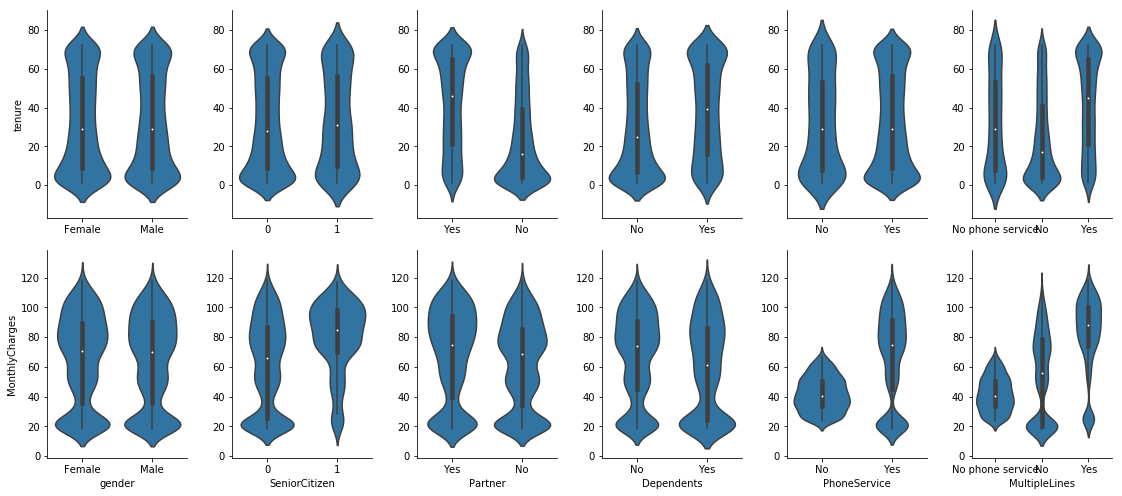

In [523]:
#Splitting the first set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[0:6].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

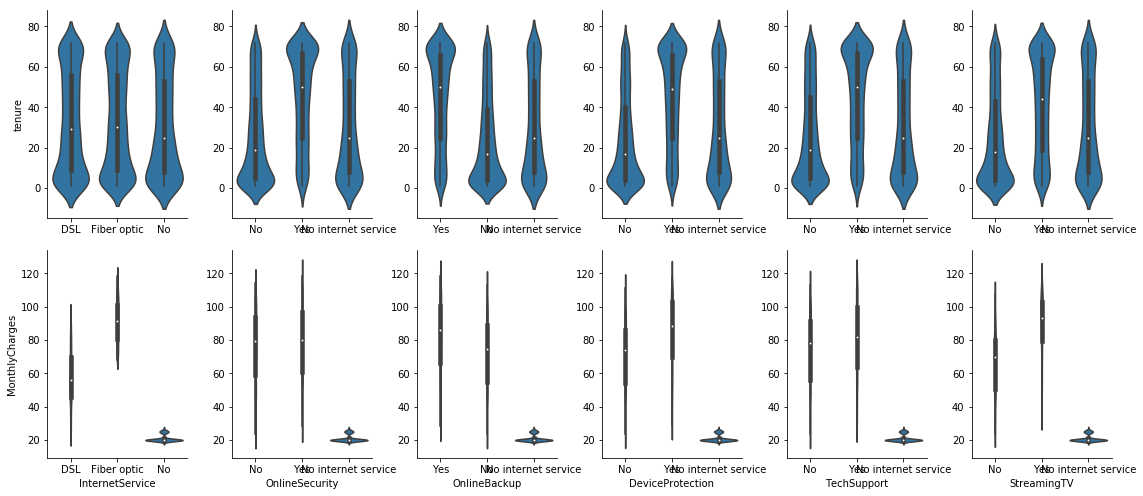

In [524]:
#Splitting the second set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[6:12].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

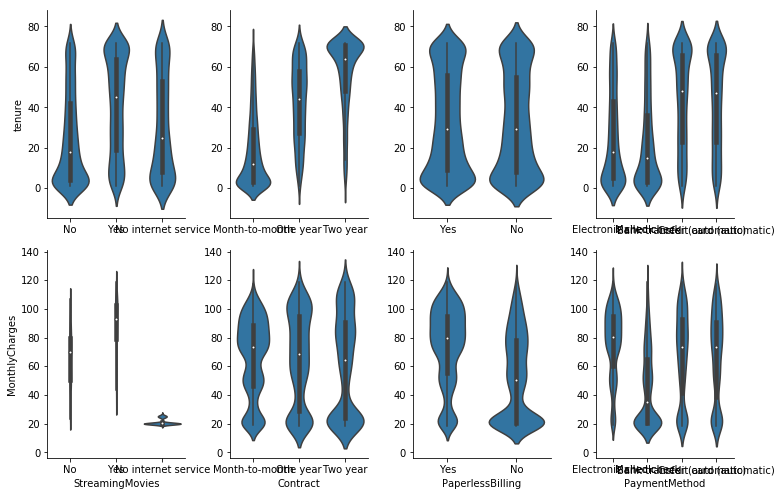

In [525]:
#Splitting the third set and plotting against numeric variables
g = sns.PairGrid(df, x_vars=obj_df.columns[12:16].values,
    y_vars=num_df.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

**From the above plots following can be deducted:**
    
    1. Customers with Eledtronic or Mailed check payment method have a lower tenure
    2. Variable like gender does not influence tenure and monthly payment 
    3. Also the importance of Fibre optic service on monthly revenue is very clear
    
> * The above conclusions from the plots are very important to design the campaigns for the firm to focus on the specific areas which needs to be enhanced in terms of service quality or affordable price to reduce the customer's churn rate. 


**But we still don’t know the variables that influences the most so we can focus on the variables that will give us the best return and we also would like to know the clients with the highest chance of leaving.**

## Now Lets focus on Categorical variables

Our main aim for Categorial plots is to get the probability of churn for each attribute value and how it varies with number of customers

Now to get an idea of the strongest variables that indicates if the client will leave and in what proportion that means how much the total client they represent, we will plot each variable as a bar plot.

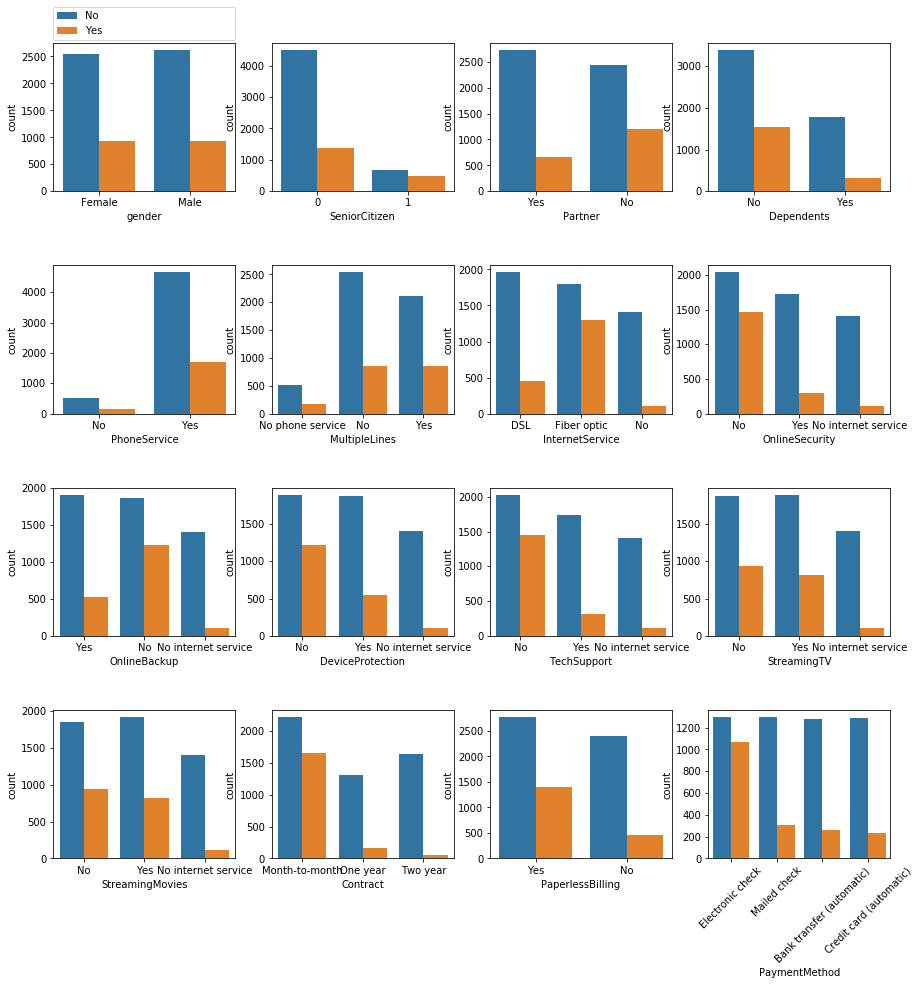

In [526]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=obj_df.iloc[:,i], hue=obj_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
   tick.set_rotation(45)

The above plots gives us a better picture of variables that are more important such as

    1. Month-to-month contract is a strong indicator if the client might leave
    2. Electronic check payment method also provide clear view to the client stability
    3. On the other hand Senior citizen is a good predictor but only represents a small amount of clients
    
**SO we need to focus on the variables that delivers best results in terms of Churn of company clients**

# Feature Engineering

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

In the dataset:
    
* There are columns with a scope of transformation, like SeniorCitizen
* There is no null data in the dataset as it has been removed intially
* Variable like CustomerId is redundant as it does not help in prediction of the churn of the clients
* As per Numerical variable analysis TotalCharges and Monthly Charges are correlated and MothlyCharges is approximately equal to product of MonthlyCharges and tenure which makes MonthlyCharges redundant




In [527]:
#Converting SeniorCitizen variable into categorical and mapping values of Yes & No to 1 & 0 respectively
df['SeniorCitizen'] = df.SeniorCitizen.map({0:'No', 1:'Yes'})

In [528]:
#Removing TotalCharges variable from the data
del num_df["TotalCharges"]

**So for the first two points above ,transformation of SeniorCitizen variable is done from integer to Categorical, Null values are deleted from the data intially and CutomerId has also been removed while Univariate analysis of variables.**

**Now we will merge the numerical variables bins into dataframe and then concatenate with the categorical variables, after we need to transform the categorical variables into binary vectors and then we will split the dataset into training and test**

In [551]:
#Now Saving numeric variable bins into a dataframe
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins]).T


In [552]:
# Concatenate bins with object variables
f=pd.concat([bins,obj_df],axis=1)

In [553]:
f.head()

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,low,low,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,medium,medium,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,low,medium,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,medium,medium,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,low,high,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


## Dummy Variables

Dummy variables are used as devices to sort data into mutually exclusive categories, here we will be converting the categorial variables into dummy variables into extensive categories to indicate the occurance of major prediction values.

In [554]:
#Creating dataframe of dummy variables
f_dummies = pd.get_dummies(data=f, columns=['tenure', 'MonthlyCharges','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])                                                 

In [555]:
f_dummies.head()

,Churn,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,0,1,0,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,No,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,Yes,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,No,0,0,1,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0
4,Yes,0,1,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


**Splitting dependent and independent variables for extracting important features**

In [557]:
features = f_dummies.drop(["Churn"], axis=1).columns
X= f_dummies[features]
y = f_dummies["Churn"]

In [558]:
#Deleting Churn variuable from the dataframe
f1_dummies = f_dummies.drop(['Churn'],axis=1)

In [559]:
f1_dummies.head()

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,1,0,1,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# Feature Selection

## Boruta Library
**We will be using Boruta for Feture selection technique**

In [560]:
!pip install Boruta

You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [561]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [562]:
# Change X and y to its values
X_boruta = X.values
y_boruta = y.values

# Define random forest classifier, with utilising all cores and sampling in proportion to y labels
rfc = RandomForestClassifier(n_jobs=-1)
 
# Define Boruta feature selection method
feature_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
 
# Find all relevant features
feature_selector.fit(X_boruta, y_boruta)

#Transposing dataframe
f2_dummies = f1_dummies.T


# Check ranking of features
f2_dummies['Boruta_Rank'] = feature_selector.ranking_
f2_dummies

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	49
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	35


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	35


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	35


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	35


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	38


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	39


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	40
Iteration: 	29 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	41


BorutaPy finished running.

Iteration: 	30 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	41


C:\Users\amand\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


,0,1,2,3,4,5,6,7,8,9,...,7034,7035,7036,7037,7038,7039,7040,7041,7042,Boruta_Rank
tenure_high,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,12
tenure_low,1,0,1,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,1,0,1
tenure_medium,0,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,2
MonthlyCharges_high,0,0,0,0,1,1,1,0,1,0,...,1,1,1,0,1,1,0,1,1,29
MonthlyCharges_low,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,32
MonthlyCharges_medium,0,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,31
gender_Female,1,0,0,0,1,1,0,1,1,0,...,1,0,1,1,0,1,1,0,0,8
gender_Male,0,1,1,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,1,1,9
SeniorCitizen_0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,22
SeniorCitizen_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,18


In [563]:
#Adding a variable 'Feature' in the dataframe
f2_dummies['Feature']=  df_dummies.index

In [564]:
# Sort the dataframe as per Mean Rank
f2_dummies = df_dummies.sort_values('Boruta_Rank')

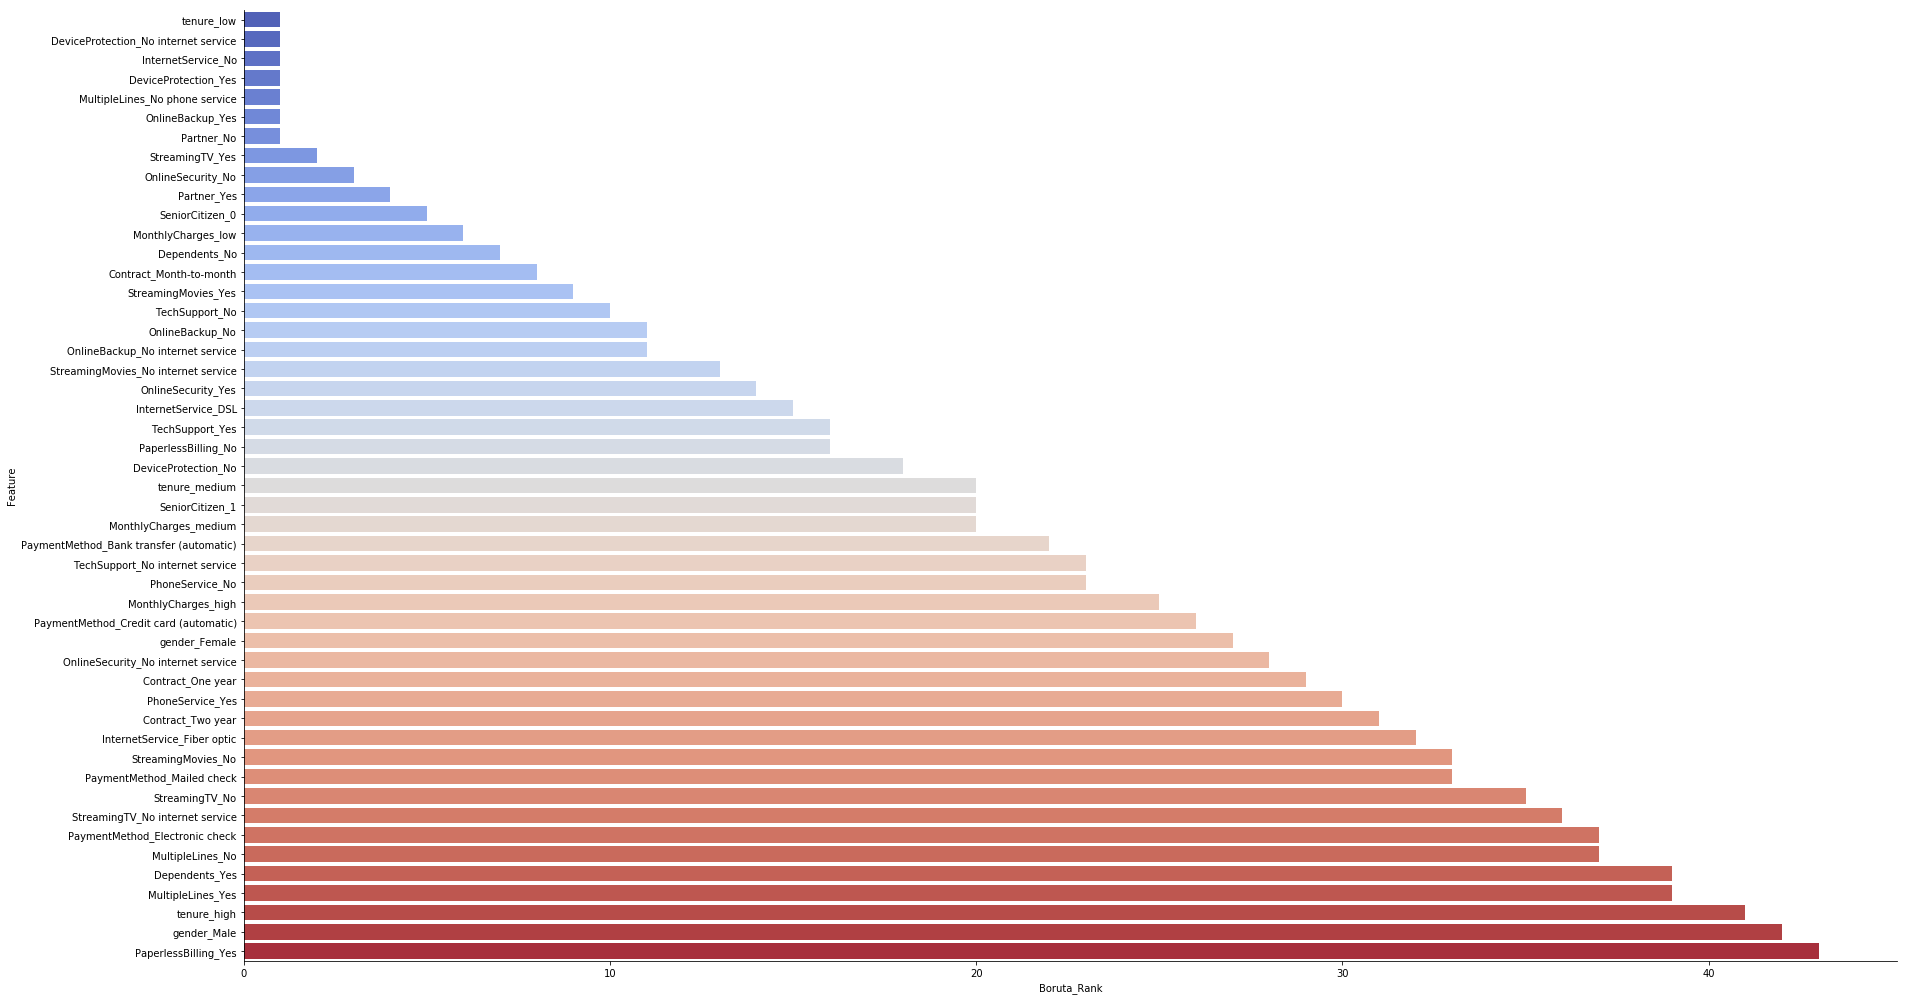

In [565]:
# Plot the ranking of the features
sns.factorplot(x='Boruta_Rank', y='Feature', data = f2_dummies, kind="bar", size=14, aspect=1.9, palette='coolwarm');

### Defining Hyperparameters
Upon Feature Selection using Boruta. Selected Tiop fetures are 

* **tenure_low**
* **DeviceProtection_No internet service**
* **InternetService_No**
* **DeviceProtection_Yes**
* **MultipleLines_No phone service**
* **OnlineBackup_Yes**
* **Partner_No**

In [568]:
f2_dummies.head(7)

,0,1,2,3,4,5,6,7,8,9,...,7035,7036,7037,7038,7039,7040,7041,7042,Boruta_Rank,Feature
tenure_low,1,0,1,0,1,1,0,1,0,0,...,1,1,0,0,0,1,1,0,1,tenure_low
DeviceProtection_No internet service,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,DeviceProtection_No internet service
InternetService_No,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,InternetService_No
DeviceProtection_Yes,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,1,0,0,1,1,DeviceProtection_Yes
MultipleLines_No phone service,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,MultipleLines_No phone service
OnlineBackup_Yes,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,OnlineBackup_Yes
Partner_No,0,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,1,1,Partner_No


In [570]:
#feature_df.index
final_selected_cols = ['tenure_low','DeviceProtection_No internet service','InternetService_No','DeviceProtection_Yes','MultipleLines_No phone service','OnlineBackup_Yes','Partner_No', 'Churn']

In [572]:
#Exporting new dataset with selected columns
df_final = f_dummies[final_selected_cols]
df_final.head()

,tenure_low,DeviceProtection_No internet service,InternetService_No,DeviceProtection_Yes,MultipleLines_No phone service,OnlineBackup_Yes,Partner_No,Churn
0,1,0,0,0,1,1,0,No
1,0,0,0,1,0,0,1,No
2,1,0,0,0,0,1,1,Yes
3,0,0,0,1,1,0,1,No
4,1,0,0,0,0,0,1,Yes


## Split training and testing dataset

**We will split our final dataset here to 80% for training and 20% for validation.**

In [575]:
features = df_final.drop(["Churn"], axis=1).columns
X= df_final[features]
Y =df_final["Churn"]
validation_size = 0.20

seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Training Models

We will try following models for prediction
    
* Logistic Regression
* KNeighborsClassifier
* DecisionTreeClassifier
* RandomForestClassifier






For compairing different models we will use Kfold method and will use the best model to predict the teat data

In [576]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.756446 (0.013884)
KNN: 0.741694 (0.018352)
CART: 0.752536 (0.015524)
RF: 0.753427 (0.013282)


From the above matrix Logistic Regression looks like the best option.

Now using Logistic Regression model on validation data


In [587]:
# Make predictions on validation dataset
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
model = models
for name,model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    
    
#print(classification_report(Y_validation, predictions))

LR
0.760483297797
[[896 121]
 [216 174]]
KNN
0.73631840796
[[840 177]
 [194 196]]
CART
0.754086709311
[[872 145]
 [201 189]]
RF
0.746268656716
[[892 125]
 [232 158]]


Tha Above metrics shows that Logistic model have good overall prediction,  however what is more important is not to predict exactly the clients that will leave but to have the probability of the client leaving or not

# Probability Estimation

We can predict the probability of churn based on the features.

In [580]:
#from sklearn.cross_validation import KFold
#import warnings
#warnings.filterwarnings('ignore')

C:\Users\amand\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [582]:
##Function for Kfold probability estiomation
#def run_prob_cv(X, y, clf_class, **kwargs):
#   kf = KFold(len(y), n_folds=5, shuffle=True)
#   y_prob = np.zeros((len(y),2))
#   for train_index, test_index in kf:
#      X_train, X_test = X[train_index], X[test_index]
#      y_train = y[train_index]
#      clf = clf_class(**kwargs)
#      clf.fit(X_train,y_train)
#      y_prob[test_index] = clf.predict_proba(X_test)
#   return y_prob

In [584]:
#pred_prob = run_prob_cv(X, Y, LogisticRegression)
#pred_churn = pred_prob[:,1]
#is_churn = Y == 1
#
## Number of times a predicted probability is assigned to an observation
#counts = pd.value_counts(pred_churn)
#
## calculate true probabilities
#true_prob = {}
#for prob in counts.index:
# true_prob[prob] = np.mean(is_churn[pred_churn == prob])
# true_prob = pd.Series(true_prob)
#
## pandas-fu
#counts = pd.concat([counts,true_prob], axis=1).reset_index()
#counts.columns = ['pred_prob', 'count', 'true_prob']
#counts["probability"] = pd.cut(counts["pred_prob"], bins=np.arange(0,1.1,0.1), labels=["%.2f"%number for number in np.arange(0,1,0.1)])
#counts.groupby("probability").agg({'count':['sum'],'pred_prob':['mean'],'true_prob': ['mean']})